## A look back to 2011- where were people 65+ living within the City of LA?
### An analysis of where older (65+) people were living in LA in 2010, so that later we can compare it to 2021 and consider trends of movement in our analysis of mobility and access to grocery stores.
#### Carolyn Pugh

In [6]:
import pandas as pd
import geopandas as gpd

#### Collecting Spatial Data

First, I need to import two files containing relevant spatial data - a geojson file showing the boundaries of the City of Los Angeles, since that is our geographic focus.  Next, a geojson file that contains block groups for the entire County of Los Angeles, since the file with the City boundary does not contain the block group information.  

In [8]:
city_bound = gpd.read_file('City_Boundaries.geojson')
blockgroups = gpd.read_file('2010_Census_Block_Groups_(Geography_Only).geojson')

Next I would like to see what this dataset looks like, and what columns it contains.

<AxesSubplot: >

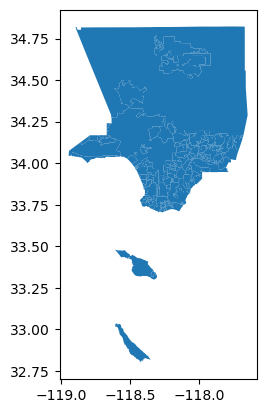

In [21]:
city_bound.plot()

This dataset includes all of LA county, so I will need to pull out just LA city for it to be useful in this analysis. Let's get a little more information.

In [18]:
city_bound.head(5)

,OBJECTID,CITY_NAME,CITY_LABEL,ABBR,OF_AREA_SM,CITY_TYPE,FEAT_TYPE,COLOR_EGIS,URL,PHONE,last_edited_date,ShapeSTArea,ShapeSTLength,geometry
0,3,Redondo Beach,Redondo Beach,RBCH,6.349,City,Breakwater,"Pink - RGB 255,190,232",www.redondo.org,3103721171,2022-07-20 00:08:28+00:00,2.483437e+05,7484.640344,"POLYGON ((-118.39951 33.84377, -118.39952 33.8..."
1,4,Long Beach,Long Beach,LB,50.309,City,Water,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-20 00:08:28+00:00,4.000260e+06,20369.924519,"POLYGON ((-118.21061 33.72181, -118.21064 33.7..."
2,5,Redondo Beach,Redondo Beach,RBCH,6.349,City,Breakwater,"Pink - RGB 255,190,232",www.redondo.org,3103721171,2022-07-20 00:08:28+00:00,9.452611e+03,701.117043,"POLYGON ((-118.39150 33.83193, -118.39160 33.8..."
3,6,Los Angeles,Los Angeles,LA,468.852,City,Breakwater,"Gray - RGB 178,178,178",www.lacity.org,2134733231,2022-07-20 00:08:28+00:00,2.857692e+05,17391.983014,"POLYGON ((-118.26566 33.70405, -118.26574 33.7..."
4,7,Long Beach,Long Beach,LB,50.309,City,Breakwater,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-20 00:08:28+00:00,1.097324e+05,5448.776853,"POLYGON ((-118.11850 33.74278, -118.11855 33.7..."


In [16]:
city_bound.columns.to_list()

['OBJECTID',
 'CITY_NAME',
 'CITY_LABEL',
 'ABBR',
 'OF_AREA_SM',
 'CITY_TYPE',
 'FEAT_TYPE',
 'COLOR_EGIS',
 'URL',
 'PHONE',
 'last_edited_date',
 'ShapeSTArea',
 'ShapeSTLength',
 'geometry']

I can use the City_Name column to query for just Los Angeles. Let's see what the LA county blockgroups dataset looks like. 

In [14]:
blockgroups.sample(3)

,OBJECTID,GEOID10,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,COMMNAME,ShapeSTArea,ShapeSTLength,geometry
5877,5879,060371352033,1352033,135203,0.1984,BG 3,44000,44000,Los Angeles,Los Angeles,LA City - Westhills,5.530259e+06,9597.429424,"POLYGON ((-118.64839 34.18679, -118.64863 34.1..."
3346,3348,060371348001,1348001,134800,0.2009,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Winnetka,5.599491e+06,13483.047104,"POLYGON ((-118.56226 34.20097, -118.56447 34.2..."
5168,5170,060372360002,2360002,236000,1.1289,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Adams/La Brea,3.147266e+07,25177.405250,"POLYGON ((-118.37209 34.01833, -118.37230 34.0..."


<AxesSubplot: >

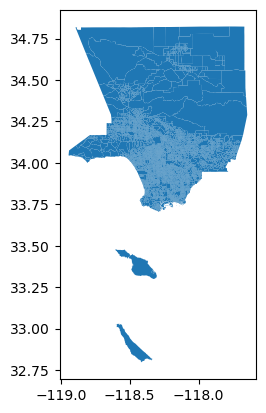

In [23]:
blockgroups.plot()

Now I will query the city boundary dataset to create a new dataset with just the City of Los Angeles. 

In [19]:
city_boundLA = city_bound.query("CITY_NAME == 'Los Angeles'").copy()

<AxesSubplot: >

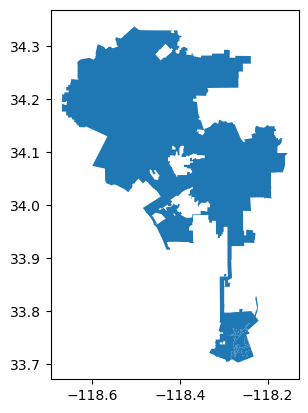

In [20]:
city_boundLA.plot()

Great. Next, I will use this dataset to "clip" the LA county blockgroups dataset, using some documentation that my lovely teammate Monisha found! https://geopandas.org/en/stable/docs/reference/api/geopandas.clip.html
This will allow me to keep the spatial information in the county dataset (the boundaries of block groups), but only within the bounds of LA city. 

In [24]:
cityblockgroups = gpd.clip(blockgroups,city_boundLA)

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

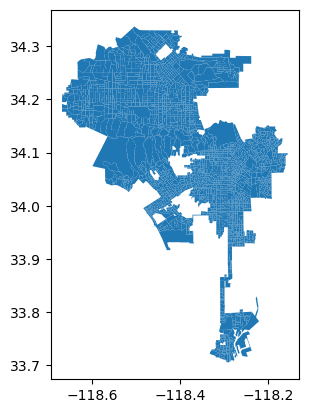

In [26]:
cityblockgroups.plot()

#### Census Data on Age in 2011

Beautiful! Now I have block group data for LA city. Next, I will pull in age data for 2011.

In [4]:
age2011 = pd.read_csv('Age2011.csv')
age2011.sample(5)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A01001_004,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013
1066,60371919011,15000US060371919011,"Block Group 1, Census Tract 1919.01, Los Angel...","Block Group 1, Census Tract 1919.01, Los Angel...",ca,150,0,ACSSF,15372,NaN,...,0,23,190,478,249,140,49,105,73,23
5582,60376039005,15000US060376039005,"Block Group 5, Census Tract 6039, Los Angeles ...","Block Group 5, Census Tract 6039, Los Angeles ...",ca,150,0,ACSSF,19888,NaN,...,2,45,12,119,54,266,43,121,39,0
6343,60379201161,15000US060379201161,"Block Group 1, Census Tract 9201.16, Los Angel...","Block Group 1, Census Tract 9201.16, Los Angel...",ca,150,0,ACSSF,20649,NaN,...,18,0,113,81,49,74,40,25,28,0
899,60371837012,15000US060371837012,"Block Group 2, Census Tract 1837.01, Los Angel...","Block Group 2, Census Tract 1837.01, Los Angel...",ca,150,0,ACSSF,15205,NaN,...,61,41,51,387,241,47,105,100,45,7
4941,60375551032,15000US060375551032,"Block Group 2, Census Tract 5551.03, Los Angel...","Block Group 2, Census Tract 5551.03, Los Angel...",ca,150,0,ACSSF,19247,NaN,...,200,86,151,256,382,445,242,129,155,30


I can see that the FIPS codes are missing the first 0, so I need to convert them to strings.

In [31]:
age2011 = pd.read_csv('Age2011.csv',
                 dtype = 
                 {
                     'Geo_FIPS':str,
                     'Geo_STATE':str, 
                     'Geo_COUNTY':str
                 }
                )
age2011.sample(5)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A01001_004,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013
4000,60375028015,15000US060375028015,"Block Group 5, Census Tract 5028.01, Los Angel...","Block Group 5, Census Tract 5028.01, Los Angel...",ca,150,0,ACSSF,18306,NaN,...,49,29,207,112,70,193,228,73,65,11
1424,60372123051,15000US060372123051,"Block Group 1, Census Tract 2123.05, Los Angel...","Block Group 1, Census Tract 2123.05, Los Angel...",ca,150,0,ACSSF,15730,NaN,...,162,103,298,618,578,340,291,110,26,8
5227,60375752011,15000US060375752011,"Block Group 1, Census Tract 5752.01, Los Angel...","Block Group 1, Census Tract 5752.01, Los Angel...",ca,150,0,ACSSF,19533,NaN,...,69,48,130,164,70,127,157,34,19,0
3144,60374070012,15000US060374070012,"Block Group 2, Census Tract 4070.01, Los Angel...","Block Group 2, Census Tract 4070.01, Los Angel...",ca,150,0,ACSSF,17450,NaN,...,208,125,241,286,369,231,213,122,15,17
5634,60376205014,15000US060376205014,"Block Group 4, Census Tract 6205.01, Los Angel...","Block Group 4, Census Tract 6205.01, Los Angel...",ca,150,0,ACSSF,19940,NaN,...,95,117,136,70,125,303,27,38,0,0


This did not work, because the original file does no include the zeros either. Instead, I will use "zfill" to add the zeros back in.

In [34]:
age2011['Geo_FIPS'] = age2011['Geo_FIPS'].str.zfill(12)

In [36]:
age2011.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A01001_004,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013
0,060371011101,15000US060371011101,"Block Group 1, Census Tract 1011.10, Los Angel...","Block Group 1, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14306,NaN,...,180,36,219,196,314,373,152,145,46,32
1,060371011102,15000US060371011102,"Block Group 2, Census Tract 1011.10, Los Angel...","Block Group 2, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14307,NaN,...,153,87,226,226,226,237,170,139,93,43
2,060371011103,15000US060371011103,"Block Group 3, Census Tract 1011.10, Los Angel...","Block Group 3, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14308,NaN,...,35,0,109,182,122,224,231,51,99,0
3,060371011221,15000US060371011221,"Block Group 1, Census Tract 1011.22, Los Angel...","Block Group 1, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14309,NaN,...,192,30,134,318,230,355,386,263,103,25
4,060371011222,15000US060371011222,"Block Group 2, Census Tract 1011.22, Los Angel...","Block Group 2, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14310,NaN,...,109,23,67,145,69,327,234,116,2,0


Next I will get rid of empty columns using "dropna"

In [38]:
age2011.dropna(how='all', axis=1, inplace=True)

In [39]:
age2011.info

<bound method DataFrame.info of           Geo_FIPS            Geo_GEOID  \
0     060371011101  15000US060371011101   
1     060371011102  15000US060371011102   
2     060371011103  15000US060371011103   
3     060371011221  15000US060371011221   
4     060371011222  15000US060371011222   
...            ...                  ...   
6420  060379800311  15000US060379800311   
6421  060379800331  15000US060379800331   
6422  060379901000  15000US060379901000   
6423  060379902000  15000US060379902000   
6424  060379903000  15000US060379903000   

                                               Geo_NAME  \
0     Block Group 1, Census Tract 1011.10, Los Angel...   
1     Block Group 2, Census Tract 1011.10, Los Angel...   
2     Block Group 3, Census Tract 1011.10, Los Angel...   
3     Block Group 1, Census Tract 1011.22, Los Angel...   
4     Block Group 2, Census Tract 1011.22, Los Angel...   
...                                                 ...   
6420  Block Group 1, Census Tract 9800

Now I only have 26 columns to work with. 

In [46]:
age2011.columns.to_list()

['Geo_FIPS',
 'Geo_GEOID',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STUSAB',
 'Geo_SUMLEV',
 'Geo_GEOCOMP',
 'Geo_FILEID',
 'Geo_LOGRECNO',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'Geo_BLKGRP',
 'SE_A01001_001',
 'SE_A01001_002',
 'SE_A01001_003',
 'SE_A01001_004',
 'SE_A01001_005',
 'SE_A01001_006',
 'SE_A01001_007',
 'SE_A01001_008',
 'SE_A01001_009',
 'SE_A01001_010',
 'SE_A01001_011',
 'SE_A01001_012',
 'SE_A01001_013']

In [51]:
age2011.rename(columns=
               {'SE_A01001_002':'Under5',
 'SE_A01001_003':'5-9',
 'SE_A01001_004':'10-14',
 'SE_A01001_005':'15-17',
 'SE_A01001_006':'18-24',
 'SE_A01001_007':'25-34',
 'SE_A01001_008':'35-44',
 'SE_A01001_009':'45-54',
 'SE_A01001_010':'55-64',
 'SE_A01001_011':'65-74',
 'SE_A01001_012':'75-84',
 'SE_A01001_013':'85+',
 'SE_A01001_001':'total' }, inplace = True)
age2011.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,...,10-14,15-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+
0,060371011101,15000US060371011101,"Block Group 1, Census Tract 1011.10, Los Angel...","Block Group 1, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14306,6,...,180,36,219,196,314,373,152,145,46,32
1,060371011102,15000US060371011102,"Block Group 2, Census Tract 1011.10, Los Angel...","Block Group 2, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14307,6,...,153,87,226,226,226,237,170,139,93,43
2,060371011103,15000US060371011103,"Block Group 3, Census Tract 1011.10, Los Angel...","Block Group 3, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14308,6,...,35,0,109,182,122,224,231,51,99,0
3,060371011221,15000US060371011221,"Block Group 1, Census Tract 1011.22, Los Angel...","Block Group 1, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14309,6,...,192,30,134,318,230,355,386,263,103,25
4,060371011222,15000US060371011222,"Block Group 2, Census Tract 1011.22, Los Angel...","Block Group 2, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14310,6,...,109,23,67,145,69,327,234,116,2,0


In [52]:
age2011.columns.to_list()

['Geo_FIPS',
 'Geo_GEOID',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STUSAB',
 'Geo_SUMLEV',
 'Geo_GEOCOMP',
 'Geo_FILEID',
 'Geo_LOGRECNO',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'Geo_BLKGRP',
 'total',
 'Under5',
 '5-9',
 '10-14',
 '15-17',
 '18-24',
 '25-34',
 '35-44',
 '45-54',
 '55-64',
 '65-74',
 '75-84',
 '85+']

Now I will create a category of 65+, since that is how my group decided to define who "seniors" are.

In [60]:
seniors_list = ['65-74', '75-84', '85+']
age2011['Seniors'] = age2011[seniors_list].sum(axis=1)
age2011.columns.to_list()

['Geo_FIPS',
 'Geo_GEOID',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STUSAB',
 'Geo_SUMLEV',
 'Geo_GEOCOMP',
 'Geo_FILEID',
 'Geo_LOGRECNO',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'Geo_BLKGRP',
 'total',
 'Under5',
 '5-9',
 '10-14',
 '15-17',
 '18-24',
 '25-34',
 '35-44',
 '45-54',
 '55-64',
 '65-74',
 '75-84',
 '85+',
 'Seniors']

#### Stats and Charts

Now I can start taking a look at the data, and making some charts. First I'll look at some descriptive statistics. 

In [61]:
age2011['Seniors'].describe()

count    6425.000000
mean      185.176498
std       131.546421
min         0.000000
25%        97.000000
50%       155.000000
75%       239.000000
max      1282.000000
Name: Seniors, dtype: float64

Let's look at a box plot of total 65+ age people per block group in 2011.

<AxesSubplot: >

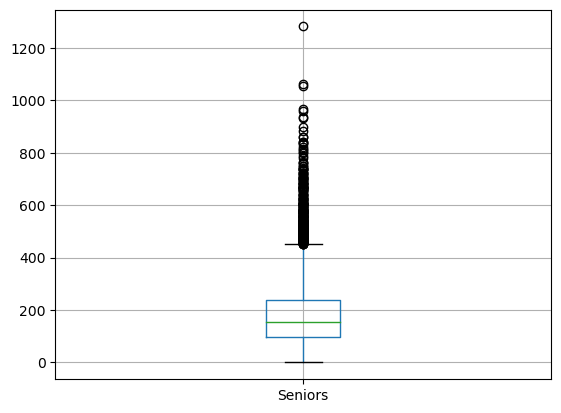

In [62]:
age2011.boxplot(column = ['Seniors'])

What is the median?

In [63]:
age2011['Seniors'].median()

155.0

There seem to to be some areas with comparatively high concentrations of senior residents.

Let's see if there is a relationship between the number of very young and older residents.

<AxesSubplot: xlabel='85+', ylabel='Under5'>

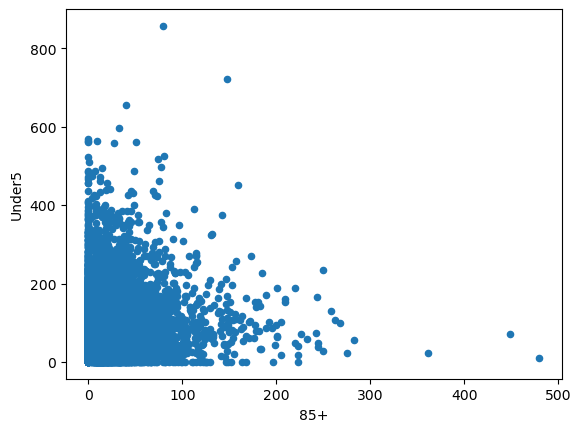

In [66]:
age2011.plot.scatter(x='85+', y= 'Under5')

#### Merging Dataframes

Now it is time to pull in the spatial dataset of block group boundaries so that I can create a map. 

In [67]:
cityblockgroups.columns.to_list()

['OBJECTID',
 'GEOID10',
 'CTBG10',
 'CT10',
 'AreaSqMil',
 'LABEL',
 'FIP10',
 'FIP10RV',
 'CDP_NAME',
 'CITYNAME',
 'COMMNAME',
 'ShapeSTArea',
 'ShapeSTLength',
 'geometry']

In [68]:
cityblockgroups.head(2)

,OBJECTID,GEOID10,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,COMMNAME,ShapeSTArea,ShapeSTLength,geometry
1943,1944,060372742022,2742022,274202,0.2663,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Venice,7.424107e+06,24946.811469,"MULTIPOLYGON (((-118.46685 33.97905, -118.4664..."
2077,2078,060372742023,2742023,274202,0.0617,BG 3,44000,44000,Los Angeles,Los Angeles,LA City - Venice,1.721313e+06,11509.120629,"POLYGON ((-118.45487 33.96624, -118.45512 33.9..."


I need to rename "GEOID10" to Geo_FIPS so that I can merge the datasets.


In [69]:
cityblockgroups.rename(columns=
               {'GEOID10':'Geo_FIPS',
 }, inplace = True)
cityblockgroups.head(2)

,OBJECTID,Geo_FIPS,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,COMMNAME,ShapeSTArea,ShapeSTLength,geometry
1943,1944,060372742022,2742022,274202,0.2663,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Venice,7.424107e+06,24946.811469,"MULTIPOLYGON (((-118.46685 33.97905, -118.4664..."
2077,2078,060372742023,2742023,274202,0.0617,BG 3,44000,44000,Los Angeles,Los Angeles,LA City - Venice,1.721313e+06,11509.120629,"POLYGON ((-118.45487 33.96624, -118.45512 33.9..."


Now that I have an identifier, "Geo_FIPS," I can join the datasets.

In [70]:
geo_age2011 = cityblockgroups.merge(age2011,on="Geo_FIPS")

<AxesSubplot: >

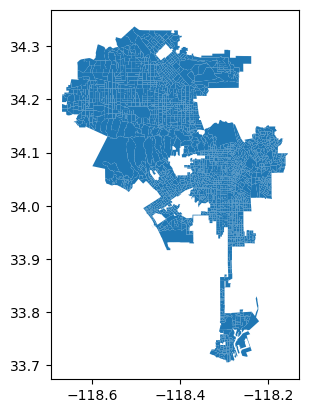

In [74]:
geo_age2011.plot()

#### Mapping population of senior community members in 2011

Great! The join seemed to work, so now I can make a map showing where seniors were living in LA in 2011. 

<AxesSubplot: >

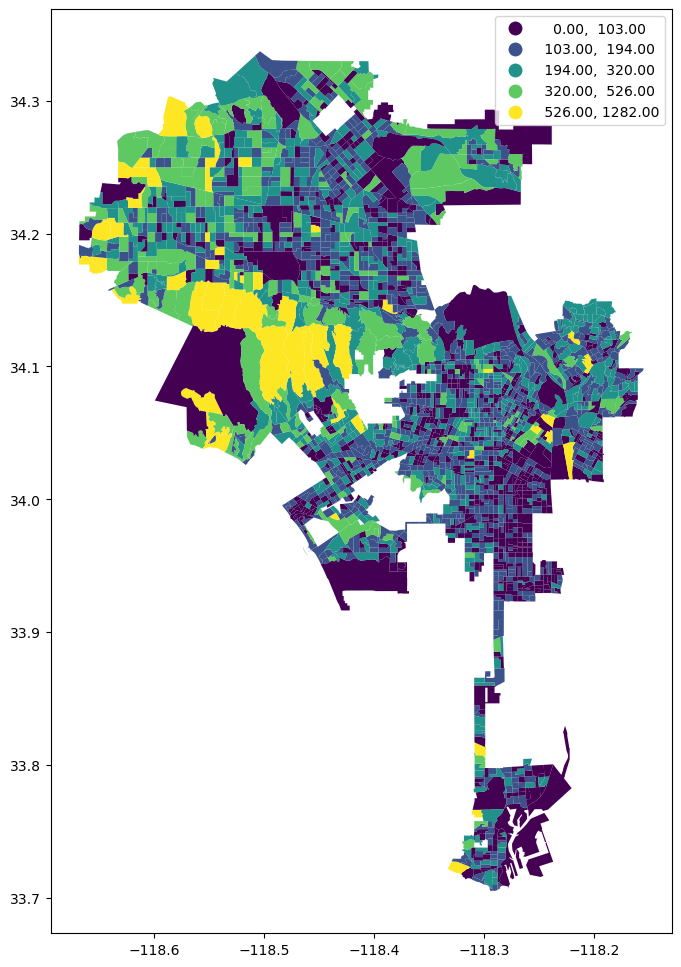

In [73]:
geo_age2011.plot(figsize=(15,12),
                column='Seniors',
                legend=True,
                scheme='NaturalBreaks'
)